## Esercizio 1.3: WSI & Pseudo-word evalutation

Per l'esecuzione del seguente esercizio è stato creato un corpus composto da due cartelle, la prima ottenuta relativa al termine *book*, la seconda al termine *apple*.

L'idea consiste nel sostituire tutti i termini *apple e book* con il termine inventato *applebook* e cercare di disambiguare mediante clustering i significati iniziali.

Per il processo di WSI creiamo un vettore di 1/0 che rappresenta il contesto della frase, l'idea è di usare una dictionary per mappare ad ogni parola di significato nel file `input_document` una posizione e creare un vettore, lungo quante parole ci son nel file, che rappresenti il contesto di tale frase mettendo 1 nelle posizioni di quelle parole presenti in tale frase e 0 nelle altre.

In fine applichiamo il *l'algoritmo di clustering kmeans* tramite `sklearn` per separare le frasi.

In [1]:
import os
import re

def load_dataset(file):
    str = open(os.getcwd()+f'\\{file}.txt', 'r', encoding="utf8").read()
    list_document = []
    #extract all document
    docs = re.findall(r'<doc[^>]*(.*?)<\/doc>', str, re.DOTALL)
    #extract all sentence for document
    for doc in docs:
        list_document.append(''.join(re.findall(r'<p>(.*)</p>', doc)))
    return list_document


word1 = 'apple'
word2 = 'book'
# list of document, each document is a string
input_document = load_dataset('apple_book_sketch')

## Preprocessing

Costruito il nostro file di partenza andiamo ad eseguire i soliti meccanismi di pre-processing sulle frasi, per ogni sentenza vogliamo come risultato una lista di termini di significato:
    
    - Per la lemmatization usiamo le librerie spacy per filtrare i termini che non sono NOUN, ADJ, VERB O ADV
    - Per le stop words usiamo il corpus di *nltk*
    - In fine filtriamo soltanto le parole che sono di tipo *alpha* ovvero con solo lettere, perchè per questo esercizio non ci interessano i numeri

In [2]:
import spacy
import nltk
from pprint import pprint
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# load spacy corpus without ner
nlp = spacy.load('en_core_web_lg', disable=['ner'])
# Carichiamo le stop words
stop_words = set(stopwords.words('english'))

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(sent) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
       
def remove_stopwords_and_punct(texts):
    return [[w for w in sentence if not w in stop_words and w.isalpha()] for sentence in texts]

# Ritorna una lista di liste di parole, ogni lista è una frase e contiene solo le context word
def preprocessing(input_document):
    text = nltk.sent_tokenize(input_document)
    # removing new line
    text = [re.sub(r'\s+', ' ', sent) for sent in text] 
    
    # lemmatization
    text = lemmatization(text)
    
    # remove punctuations and stop words
    text = remove_stopwords_and_punct(text)
    return [t for t in text if len(t)>0]

# Example
pprint(preprocessing(' '.join(input_document)), width=1000)

[['book', 'read', 'post', 'contain', 'affiliate', 'link'],
 ['read', 'disclosure', 'policy', 'information'],
 ['let', 'go', 'good', 'startup', 'book', 'founder', 'read'],
 ['book', 'include', 'list', 'cover', 'unique', 'perspective', 'build', 'well', 'startup'],
 ['help', 'gather', 'important', 'feedback', 'iterate', 'improve', 'idea', 'turn', 'sustainable', 'business'],
 ['let', 'jump', 'directly', 'list'],
 ['begin', 'book', 'number'],
 ['read', 'book', 'build', 'startup', 'really', 'focus', 'importance', 'identify', 'clarify', 'underlie', 'assumption', 'startup', 'really', 'early', 'process'],
 ['focus', 'primarily', 'value', 'assumption', 'growth', 'assumption'],
 ['value', 'assumption', 'go', 'underlying', 'belief', 'customer', 'value', 'appreciate', 'aim', 'create'],
 ['number', 'go', 'assumption', 'plan', 'attract', 'customer', 'business', 'profitable', 'way'],
 ['book', 'really', 'focus', 'get', 'clear', 'assumption', 'find', 'inexpensive', 'way', 'test', 'validate', 'really', 

 ['people', 'already', 'mention', 'geographical', 'location', 'also', 'go', 'determine', 'understanding', 'politic'],
 ['even', 'country', 'political', 'belief', 'go', 'totally', 'agree', 'certain', 'thing', 'country', 'claim', 'belong', 'certain', 'political', 'movement', 'reality', 'practice', 'completely', 'different'],
 ['want', 'completely', 'unhelpful', 'book', 'personally', 'read', 'think', 'offer', 'broad', 'insight', 'important', 'political', 'topic', 'fascism', 'warning', 'first', 'woman', 'ever', 'serve', 'secretary', 'state', 'study', 'history', 'also', 'active', 'role', 'shape'],
 ['bear', 'second', 'lifetime', 'flee', 'also', 'start'],
 ['lose', 'love', 'one', 'talk', 'woman', 'personal', 'experience', 'horror', 'politic', 'cause'],
 ['first', 'book', 'deal', 'fascism', 'topic', 'see', 'crop', 'political', 'discussion'],
 ['great', 'job', 'explain', 'fascism', 'really', 'start', 'also', 'warning', 'sign', 'rise', 'current', 'political', 'climate'],
 ['feel', 'word', 'late

 ['wild', 'think', 'lose'],
 ['mother', 'passing', 'family', 'trouble', 'divorce', 'drive', 'impulsive', 'decision', 'walk', 'mile'],
 ['inspire', 'see', 'true', 'self', 'worth', 'capability'],
 ['history'],
 ['brief', 'history', 'humankind', 'look', 'interesting', 'book', 'read', 'list'],
 ['detail', 'development', 'human', 'early', 'stage'],
 ['author', 'also', 'show', 'current', 'world', 'system', 'banish', 'natural', 'selection', 'adaptation'],
 ['long', 'walk', 'read', 'biography', 'almost', 'always', 'include', 'wonderful', 'book'],
 ['start', 'write', 'autobiography', 'prison', 'finish', 'right', 'become', 'president'],
 ['inspiring', 'story', 'provide', 'glimpse', 'end', 'apartheid', 'blatant', 'inequality', 'country'],
 ['fall', 'new', 'history', 'find', 'dinosaur', 'fascinating'],
 ['read', 'book', 'subject'],
 ['reveal', 'different', 'dinosaur', 'roam', 'planet', 'different', 'world', 'live'],
 ['short', 'history', 'nearly', 'short', 'history', 'nearly', 'attempt', 'summariz

 ['hydrogen', 'cyanide', 'colorless', 'flammable', 'gas', 'distinctive', 'bitter', 'almond', 'smell'],
 ['hydrogen', 'cyanide', 'highly', 'toxic', 'fatal', 'dog', 'mammal'],
 ['exposure', 'result', 'rapid', 'breathing', 'irregular', 'heart', 'function', 'coma', 'convulsion', 'death', 'hour', 'respiratory', 'failure'],
 ['apple', 'healthy', 'beagle'],
 ['make', 'sure', 'apple', 'core', 'seed', 'part', 'tree', 'give', 'pet', 'dangerous'],
 ['never', 'give', 'whole', 'apple', 'big', 'chunk', 'fruit'],
 ['always', 'slice', 'first', 'thin', 'slice', 'easily', 'digestible'],
 ['eat'],
 ['however', 'apple', 'peel', 'feed', 'pet', 'dog', 'small', 'amount'],
 ['apple', 'peel', 'issue', 'feed', 'dog', 'slice', 'apple'],
 ['however', 'large', 'amount', 'apple', 'cause', 'digestive', 'problem'],
 ['serve', 'remove', 'apple', 'core', 'seed', 'minimize', 'digestive', 'issue'],
 ['however', 'want', 'feed', 'dog', 'apple', 'core', 'remove', 'apple', 'seed', 'toxic', 'dog'],
 ['dog', 'eat', 'green', 'a

Sostituiamo al risultato del preprocessing tutti i termini *apple e book* per inserire uno nuovo inventato *applebook*

Le sostituzioni son memorizzate nella variabile `expected_result` che useremo al termine per calcolare l'accuratezza del clustering

Useremo i label `0 per book` e `1 per apple`

In [3]:
import numpy as np

_BOOK = 0
_APPLE = 1

# ricompattiamo in una stringa per sfruttare il separatore di nltk nel preprocessing
pp =  preprocessing(' '.join(input_document))
# filtro per rimuovere le frasi di non interesse
text = [sent for sent in pp  if 'book' in sent or 'apple' in sent]
counter = 0 # semplice controllo per essere sicuri che non ci siano frasi in cui compaiono sia book che apple
expected_result = np.zeros(len(text))

for i, p in enumerate(text):
    if not ('book' in p or 'apple' in p):
        print('\n\n',p)
        counter += 1
    if 'book' in p:
        expected_result[i] = _BOOK
        text[i] = [word if word != 'book' else 'applebook' for word in p]
    elif 'apple' in p:
        expected_result[i] = _APPLE
        text[i] = [word if word != 'apple' else 'applebook' for word in p]
    
print(text)
print(expected_result)
print(counter)


[['applebook', 'read', 'post', 'contain', 'affiliate', 'link'], ['let', 'go', 'good', 'startup', 'applebook', 'founder', 'read'], ['applebook', 'include', 'list', 'cover', 'unique', 'perspective', 'build', 'well', 'startup'], ['begin', 'applebook', 'number'], ['read', 'applebook', 'build', 'startup', 'really', 'focus', 'importance', 'identify', 'clarify', 'underlie', 'assumption', 'startup', 'really', 'early', 'process'], ['applebook', 'really', 'focus', 'get', 'clear', 'assumption', 'find', 'inexpensive', 'way', 'test', 'validate', 'really', 'early', 'spend', 'lot', 'time', 'energy', 'money', 'build', 'business', 'process', 'core', 'idea'], ['applebook', 'cover', 'venture', 'unique', 'day', 'process', 'answer', 'critical', 'question', 'really', 'early', 'product', 'development', 'process'], ['many', 'way', 'pick', 'leave', 'applebook', 'really', 'focus', 'want', 'conduct', 'thing', 'prototype', 'make', 'sure', 'validate', 'idea', 'really', 'early'], ['applebook', 'provide', 'lot', 'fr

## Creiamo la dictionary parola - indice/posizione

Costruiamo la dictionary che useremo per creare i vettori delle singole frasi. Associamo quindi ad ogni parola una numero che sarà la sua posizione all'interno del vettore.

In [4]:
dict_words = {}
index = 0

for sent in text:
    for word in sent:
        if word not in dict_words.keys():
            dict_words[word] = index
            index += 1

pprint(dict_words)

{'More': 262,
 'Most': 809,
 'People': 340,
 'abandon': 1033,
 'able': 899,
 'absolute': 614,
 'access': 1230,
 'accord': 202,
 'accurate': 569,
 'accustom': 879,
 'acetylcholine': 814,
 'acid': 805,
 'act': 1019,
 'active': 506,
 'activity': 873,
 'actually': 471,
 'adapt': 274,
 'adaptation': 402,
 'add': 447,
 'addition': 869,
 'additional': 133,
 'additionally': 769,
 'address': 372,
 'adult': 1010,
 'advantage': 839,
 'adventure': 400,
 'adventurous': 531,
 'advertisement': 841,
 'advertising': 171,
 'advice': 1314,
 'advise': 1165,
 'advocate': 1029,
 'affair': 613,
 'affect': 789,
 'affectionately': 473,
 'affiliate': 4,
 'afterward': 1191,
 'age': 810,
 'ago': 337,
 'agree': 527,
 'aid': 942,
 'aim': 1099,
 'alcohol': 995,
 'allergic': 893,
 'allergy': 895,
 'allow': 990,
 'almond': 922,
 'almost': 339,
 'alone': 365,
 'also': 218,
 'alter': 1090,
 'always': 586,
 'american': 558,
 'amount': 521,
 'ample': 1233,
 'amygdalin': 1156,
 'animal': 823,
 'animated': 396,
 'anniversar

 'impressive': 663,
 'improve': 88,
 'impurity': 1136,
 'inadvertently': 1061,
 'inch': 667,
 'include': 11,
 'incomplete': 208,
 'incorporate': 1345,
 'increase': 1097,
 'incredibly': 825,
 'indeed': 368,
 'independent': 206,
 'indigestion': 1148,
 'individual': 192,
 'industry': 161,
 'inexpensive': 32,
 'inflammation': 781,
 'inflammatory': 783,
 'information': 85,
 'informed': 484,
 'ingredient': 1181,
 'initial': 250,
 'injure': 796,
 'injury': 803,
 'inshort': 268,
 'insight': 498,
 'inspire': 360,
 'inspiring': 165,
 'installment': 243,
 'instalment': 269,
 'instead': 252,
 'intake': 853,
 'integrate': 144,
 'intention': 316,
 'interactive': 429,
 'interested': 115,
 'interesting': 650,
 'interfere': 1213,
 'invest': 621,
 'involve': 824,
 'irritable': 1078,
 'issue': 212,
 'iterate': 87,
 'jam': 597,
 'jelly': 1342,
 'job': 610,
 'join': 452,
 'journal': 430,
 'journey': 103,
 'joyous': 630,
 'juice': 698,
 'junk': 998,
 'k': 680,
 'keep': 833,
 'key': 255,
 'kg': 702,
 'kill':

 'sip': 1296,
 'sit': 1248,
 'site': 175,
 'size': 292,
 'sized': 1110,
 'skim': 957,
 'skin': 688,
 'slate': 414,
 'slice': 694,
 'slightly': 1280,
 'small': 543,
 'smart': 1339,
 'snack': 925,
 'snap': 377,
 'social': 637,
 'soda': 994,
 'sole': 1250,
 'soluble': 727,
 'soon': 1299,
 'soothe': 1146,
 'soothing': 572,
 'sore': 1331,
 'source': 207,
 'soy': 960,
 'space': 156,
 'spawn': 412,
 'speak': 1086,
 'specific': 1182,
 'specifically': 787,
 'speculate': 1012,
 'spend': 36,
 'spike': 1303,
 'spoiler': 1267,
 'spokesman': 404,
 'spontaneously': 644,
 'spring': 552,
 'sprinkle': 930,
 'stand': 623,
 'staple': 1207,
 'star': 411,
 'start': 130,
 'startup': 9,
 'starvation': 1220,
 'starve': 1212,
 'state': 504,
 'statin': 731,
 'stay': 380,
 'still': 309,
 'stomach': 798,
 'storm': 540,
 'story': 446,
 'stranger': 559,
 'strategy': 153,
 'strawberry': 875,
 'strengthen': 1112,
 'strip': 1297,
 'stroke': 741,
 'strong': 68,
 'study': 505,
 'stuffing': 1348,
 'sturdy': 1326,
 'subjec

## Il vettore del contesto

Usando la dictionary precedente possiamo costruire il nostro vettore contesto.

Si è deciso di considerare come parole di contesto tali parole che son posizionate ad una distanza `range` dalla parola su cui si vuole disambiguare. Nel seguente caso tale distanza è impostata a 3 e sarà calcolata solo sui termini di significato quindi se per esempio la parola *applebook* compare dopo *the*, il *the* non sarà considerato nel conteggio.


In [5]:
word1 = 'apple'
word2 = 'book'
def context_vector(list_words, word, range=3):
    # creiamo vettore di zeri
    vect = [0] * len(dict_words)
    # estraiamo l'indice della parola 'word' da disambiguare
    i = list_words.index(word)
    
    # settiamo gli indici minimo e massimo su cui poter ciclare, serve per non andare out of bound
    i_prev = max(i-range, 0)
    i_next = min(i+range+1, len(list_words))  # il +1 serve perchè altrimenti la lista viene creata tagliando l'ultimo
    
    # per ogni parola nell'intervallo che compare nella nostra sentence ( list_words) mettiamo il valore a 1
    for w in list_words[i_prev:i_next]:
        if w != word:
            vect[dict_words.get(w)] = 1
    return vect

# Example
print(f'Frase di esempio {text[0]}')
print('Vettore del contesto:')
print(context_vector(text[0], word1+word2, 3))
    

Frase di esempio ['applebook', 'read', 'post', 'contain', 'affiliate', 'link']
Vettore del contesto:
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Applichiamo quanto fatto a tutte le frasi del documento

In [6]:
def create_list_of_context(word_to_disambiguate, range):
    list_of_context = []
    for sent in text:
        list_of_context.append(context_vector(sent, word_to_disambiguate, range))
    return list_of_context

list_of_context = create_list_of_context(word1+word2, 10)
for context in list_of_context:
    print(context)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Cluster

Ottenuti tutti i nostri vettori usiamo la libreria `sklearn`, in particolare il metodo `KMeans` per costruire automaticamente i cluster

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import sys
np.set_printoptions(threshold=sys.maxsize)

X = np.array(list_of_context)
km = KMeans(n_clusters=2, random_state=1).fit(X) #random_state specifica da dove partire per creare i centroidi
print("Risultati predetti:")
pprint(km.labels_)

print("\nRisultati attesi:")
pprint(expected_result)

print("\n\nAccuratezza del risultato = ",accuracy_score(expected_result, km.labels_))

Risultati predetti:
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 

<ipython-input-8-af045af02003>:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  km = KMeans(n_clusters=2, random_state=1).fit(X) #random_state specifica da dove partire per creare i centroidi
No handles with labels found to put in legend.


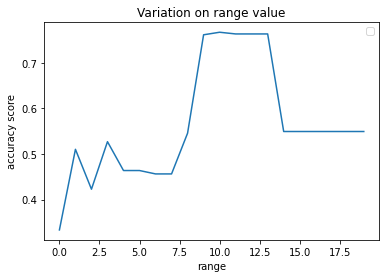

In [8]:
acc_list = []
for i in range(20):
    list_of_context = create_list_of_context(word1+word2, i)
    X = np.array(list_of_context)
    km = KMeans(n_clusters=2, random_state=1).fit(X) #random_state specifica da dove partire per creare i centroidi
    acc_list.append(accuracy_score(expected_result, km.labels_))
    
import matplotlib.pyplot as plt

plt.plot(acc_list)
plt.title('Variation on range value')
plt.xlabel('range')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

Notiamo che con valori compresi di `range` tra 8-13 si hanno risultati molto soddisfacenti, tuttavia come mostrato nell'esempio precedente si nota una prevalenza di eticchette per la classe 1, di apple.

Si può dedurre che in tale fascia di raggio si abbia una prevalenza della seconda classe ed essendo 2/3 del dataset legati ad apple, da molti risultati corretti.

Andrebbe applicato un ulteriore step di pesatura delle classi